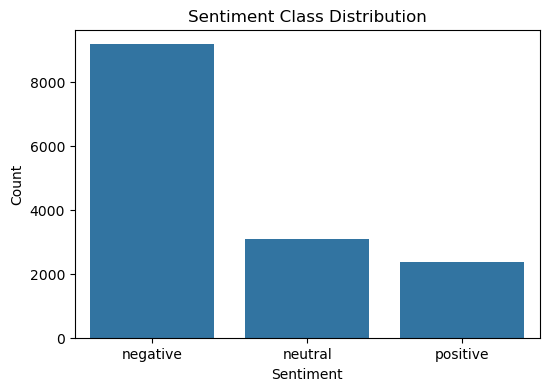

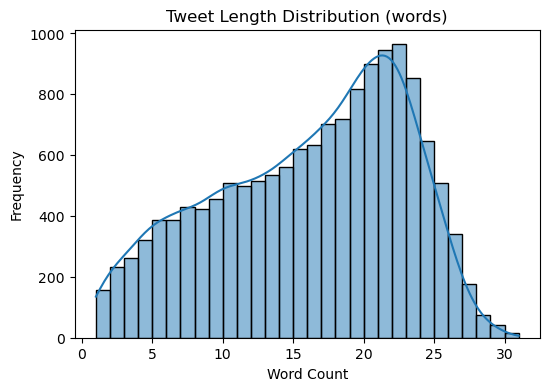

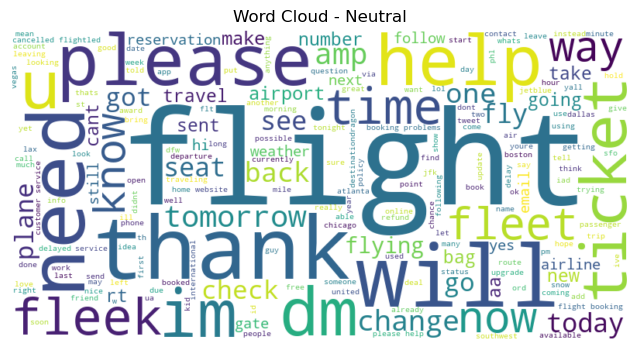

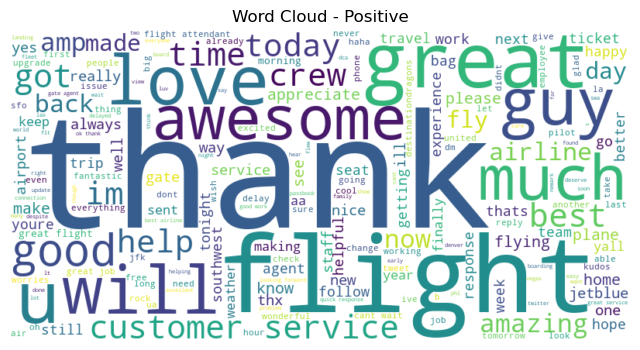

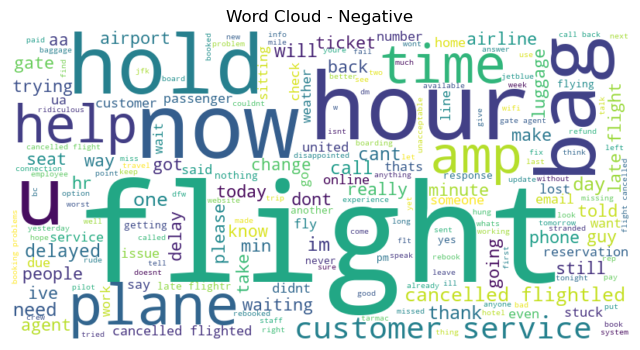


Top 20 Most Common Words:
to: 8643
the: 6053
i: 5375
a: 4546
you: 4110
for: 3995
flight: 3895
on: 3778
and: 3709
my: 3273
is: 2827
in: 2529
of: 2121
me: 1913
it: 1880
your: 1738
have: 1642
was: 1606
not: 1564
with: 1523


In [1]:
# 📘 01_EDA_Visual_Insights.ipynb

# ✅ 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

# ✅ 2. Load Shared Preprocessing
from shared_preprocessing import clean_text

# ✅ 3. Load Dataset
path = "D:/Sentimental-Analysis/data/Tweets.csv"
df = pd.read_csv(path)
df = df[['airline_sentiment', 'text']].dropna()
df['clean_text'] = df['text'].apply(clean_text)

# ✅ 4. Sentiment Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='airline_sentiment', order=df['airline_sentiment'].value_counts().index)
plt.title("Sentiment Class Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# ✅ 5. Tweet Length Distribution
df['text_length'] = df['clean_text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(6, 4))
sns.histplot(df['text_length'], bins=30, kde=True)
plt.title("Tweet Length Distribution (words)")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

# ✅ 6. WordCloud per Sentiment
sentiments = df['airline_sentiment'].unique()

for sentiment in sentiments:
    plt.figure(figsize=(8, 5))
    text = " ".join(df[df['airline_sentiment'] == sentiment]['clean_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud - {sentiment.capitalize()}")
    plt.show()

# ✅ 7. Most Common Words (Optional Table)
all_words = " ".join(df['clean_text']).split()
common_words = Counter(all_words).most_common(20)
print("\nTop 20 Most Common Words:")
for word, freq in common_words:
    print(f"{word}: {freq}")


